# Linear Regressions Revisited

In this exercise we'll revise our use of Linear Regressions from SKLearn but now with the mindset of Supervised Machine Learning.

I've outlined most of the steps for you both in text and with some starter code. Anywhere you see a `...` is something you should replace.

They steps you'll perform are:

1. Load and clean the dataset (I've already done this for you).

2. Split the data into a "train set" and a "test set". An easy split will be anything after 1959 being in the test set. For example:
   ```python
   df_train = df[df["Month"] < "1959-01-01"].copy()
   df_test = ...
   ```

3. Split the dataframes into their features (X) and labels (y). In our previous exercise, we did this as so:
   ```python
   X = df[["Month Count"]]
   y = df["Passengers"]
   ```
   You'll want to do something like this, but create an `X_train`, `X_test`, `y_train`, and `y_test` variable.

4. Fit the model using the training `X` and `y`.
5. After plotting and seeing your prediction, calculate the Mean Squared Error of this function. The way you will calculate this is: $$MSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2$$
   Or, in words:
   1. Calculate the difference of every value in `y_test` from the matching value in `y_pred`.
   2. Square each difference.
   3. Calculate the mean of all the differences.

   Hint: You can do this all with the pandas series `y_test` and `y_pred`.


## Bonus

Once you've plotted and calculated the MSE, write it down and try this new model insted of the `LinearRegression`:

```python
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# Train the model
model = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('linear', LinearRegression())
])
model.fit(X_train, y_train)
```

Ask yourself:
- What do you think is different about this model?
- Is it better or worse than our previous model?
- What might you change about it to try and improve its performance?

In [1]:
from google.colab import drive
import pandas as pd

drive.mount('/content/gdrive')

# 1. Load an clean the data
df = pd.read_csv('/content/gdrive/My Drive/datasets/air_passengers.csv')
df.rename(columns={'#Passengers': 'Passengers'}, inplace=True)
df['Month'] = pd.to_datetime(df['Month'])
df['Month Count'] = (df['Month'].dt.year - 1949) * 12 + df['Month'].dt.month - 1
df

Mounted at /content/gdrive


,Month,Passengers,Month Count
0,1949-01-01,112,0
1,1949-02-01,118,1
2,1949-03-01,132,2
3,1949-04-01,129,3
4,1949-05-01,121,4
...,...,...,...
139,1960-08-01,606,139
140,1960-09-01,508,140
141,1960-10-01,461,141
142,1960-11-01,390,142


<Axes: xlabel='Month', ylabel='Passengers'>

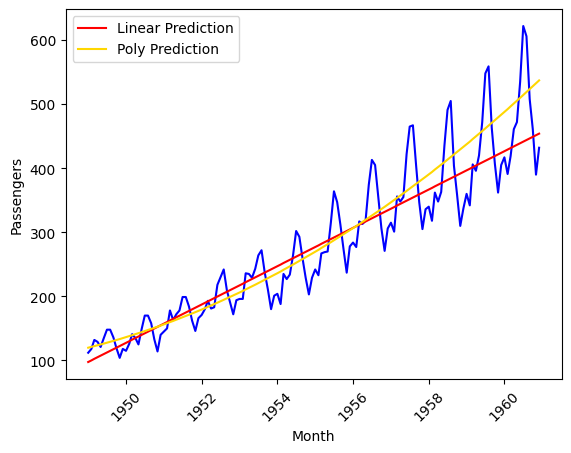

In [12]:
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# 2. Separate our train and test set (use before 1958 as train, and after as test)
df_train = df[df["Month"] < "1958-01-01"].copy()
df_test = df[df["Month"] >= "1958-01-01"].copy()

# 3. Break out a set of train features (X) and train labels (y) and the same for test.
X_train = df_train[["Month Count"]]
y_train = df_train["Passengers"]
X_test = df_test[["Month Count"]]
y_test = df_test["Passengers"]

# Train the model
linear_model = LinearRegression()

poly_model = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('linear', LinearRegression())
])

linear_model.fit(X_train, y_train)
poly_model.fit(X_train, y_train)

# Predict values for our test set
linear_y_pred = linear_model.predict(df[["Month Count"]])
df["Linear Prediction"] = linear_y_pred
poly_y_pred = poly_model.predict(df[["Month Count"]])
df["Poly Prediction"] = poly_y_pred

# Plot the original values in blue and the prediction in red
plt.xticks(rotation=45)
sns.lineplot(df, x="Month", y="Passengers", color="blue")
sns.lineplot(df, x="Month", y="Linear Prediction", color="red", label="Linear Prediction")
sns.lineplot(df, x="Month", y="Poly Prediction", color="gold", label="Poly Prediction")

# # 5. Calculate the MSE of the prediction against the y_test
# mse = ((y_pred - y_test)**2).mean()
# print(f"MSE: {mse}")
